In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df = pd.read_csv('../data/raw/WildBlueberryPollinationSimulationData.csv')

In [22]:
df.drop('Row#', axis= 1, inplace = True)

In [23]:
df_X = df.drop('yield', axis= 1)

In [24]:
y = df['yield']

In [25]:
df.shape

(777, 17)

In [26]:
df_X.shape

(777, 16)

In [27]:
y.shape

(777,)

In [28]:
y.to_csv('../data/processed/y.csv', index = False)

In [29]:
df_X.to_csv('../data/processed/X_sin_Row.csv')

A continuacion haremos un scalado de las variable numericas

In [30]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [31]:
pd.DataFrame(MaxAbsScaler().fit_transform(df), 
             columns = df.columns).to_csv('../data/processed/X_sin_Row_MaxAbsScaler.csv')

In [32]:
pd.DataFrame(MinMaxScaler().fit_transform(df), 
             columns = df.columns).to_csv('../data/processed/X_sin_Row_MinMaxScaler.csv')

In [33]:
pd.DataFrame(Normalizer().fit_transform(df), 
             columns = df.columns).to_csv('../data/processed/X_sin_Row_Normalizer.csv')

In [34]:
pd.DataFrame(StandardScaler().fit_transform(df), 
             columns = df.columns).to_csv('../data/processed/X_sin_Row_StandardScaler.csv')

In [35]:
pd.DataFrame(RobustScaler().fit_transform(df), 
             columns = df.columns).to_csv('../data/processed/X_sin_Row_RobustScaler.csv')

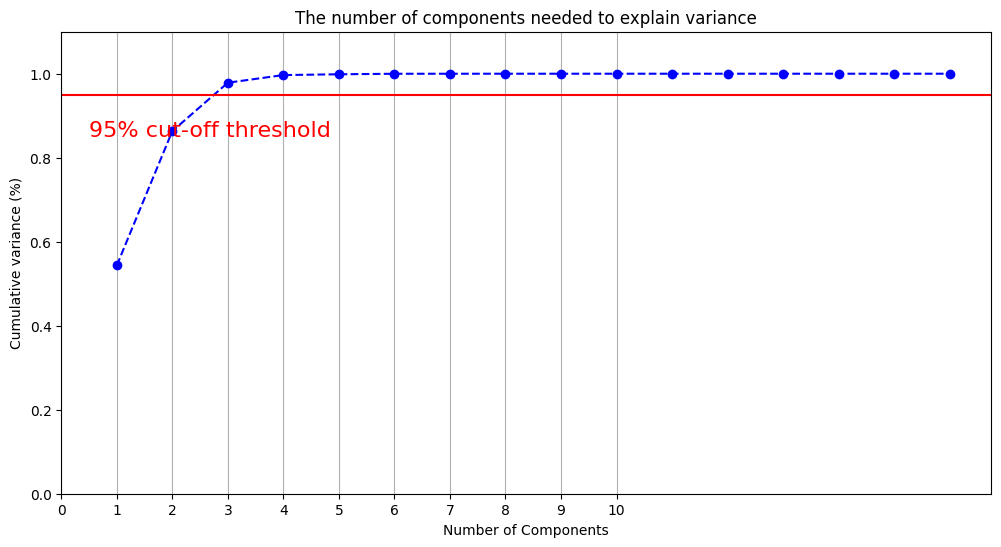

In [36]:
aux = df.drop(columns=['yield'])
pca = PCA().fit(aux)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()

xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [37]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')